# M2-L1 Problem 1 (5 points)

In this question you will perform linear least squares regression on a very small dataset of 3 points. First, load and plot the data by running the following cell.

The variables provided are:
- x: 3x1 input data
- y: 3x1 output data

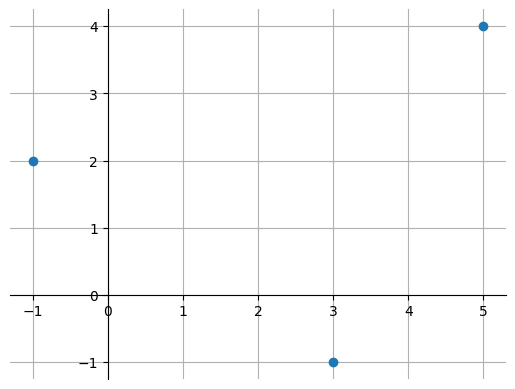

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = np.array([[-1, 3, 5]]).T
y = np.array([[2, -1, 4]]).T

fig, ax = plt.subplots()
plt.plot(x, y,'o')
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
sns.despine()
plt.grid()
plt.show()

## Construct a design matrix

For 1-D linear regression, the design matrix must contain not only a column of input x-values, but also a 'bias column' -- a column of ones (to allow the regression line to have an intercept).

The next step is to construct the design matrix `X` by concatenating a column of ones to the given input `x`. This has been done for you below:

In [9]:
bias = np.ones_like(x)

X = np.concatenate([x,bias],1)

print("Design Matrix:\n",X)

Design Matrix:
 [[-1  1]
 [ 3  1]
 [ 5  1]]


## Solving for regression coefficients

Now that we have the design matrix $X$ and the output $y$, we can solve for the coefficients $w$ such that $X w \approx y$ using:
$$
w = (X'\, X)^{-1}\, X'\, y
$$

Note that you can use the following in Python:
- `@` for matrix multiplication
- `np.linalg.inv(A)` for inversion of matrix `A`
- `A.T` for transpose of a matrix `A`
- `b.reshape(-1,1)` to treat 1D array `b` as a column (you will need to do this for `y`)



Your line's slope should be $\approx 0.18$ and your y-intercept should be $\approx 1.25$.

In [10]:
# YOUR CODE GOES HERE
# Get coefficients w
w = np.linalg.inv(X.T @ X) @ X.T @ y

print("Linear Coefficients:\n", w)

Linear Coefficients:
 [[0.17857143]
 [1.25      ]]


## Making predictions

Now that we have the coefficients, we can make predictions on new data with the model.

Do the following steps:
- [Given] Sample 40 points on the interval [-3,7], such as by using `np.linspace()` (Append `.reshape(-1,1)` to convert to a column)
- [Given] Create a design matrix by adding a column of ones as done previously
- Make a prediction by multiplying your new design matrix by `w`. You can do matrix multiplication with the `@` symbol

- [Given] Add a line to the plot showing these predictions



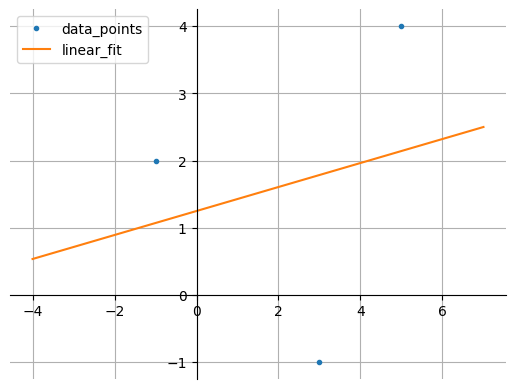

In [14]:
n = 40
x_test = np.linspace(-4,7,n).reshape(-1,1)
bias_test = np.ones_like(x_test)
X_test = np.concatenate([x_test, bias_test], 1)

# YOUR CODE GOES HERE
# Predict y_test
y_test = X_test @ w

fig, ax = plt.subplots()
plt.plot(x, y, '.')
plt.plot(x_test, y_test)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
plt.legend(['data_points', 'linear_fit'])
sns.despine()
plt.grid()
plt.show()